<a href="https://colab.research.google.com/github/SatriaImawan12/Stock-Market-Analysis-And-Forecasting-Using-GRU-Model-Deep-Learning-/blob/main/Stock_Market_Analysis_And_Forecasting_Using_GRU_Model_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock Market Analysis And Forecasting**

Pasar saham adalah proses jual beli saham antara pembeli dan penjual saham, yang mewakili klaim kepemilikan pada bisnis, ini mungkin termasuk sekuritas yang terdaftar di bursa saham publik, serta saham yang hanya diperdagangkan secara pribadi, seperti saham perusahaan swasta yang dijual kepada investor melalui platform crowdfunding ekuitas. Investasi di pasar saham paling sering dilakukan melalui pialang saham dan platform perdagangan elektronik. Investasi biasanya dilakukan dengan strategi investasi dalam pikiran.

Prediksi saham selalu menjadi masalah yang menantang bagi para ahli statistik dan keuangan. Alasan utama di balik prediksi ini adalah membeli saham yang kemungkinan besar akan naik harganya dan kemudian menjual saham yang mungkin akan jatuh. Secara umum, ada dua cara untuk prediksi pasar saham. Analisis fundamental adalah salah satunya dan bergantung pada teknik perusahaan dan informasi dasar seperti posisi pasar, biaya, dan tingkat pertumbuhan tahunan. Yang kedua adalah metode analisis teknis, yang berfokus pada harga dan nilai saham sebelumnya.

Pada bagian pertama proyek, kami akan mencoba menganalisis data. Dan pada bagian kedua, kami akan memprediksi pasar saham.

#**Dataset**

Dataset yang digunakan dapat [didownload disini](https://drive.google.com/file/d/1Onl2AtGKzA28zjJXc__1wymB66cGjX33/view?usp=sharing)

#**Analysis**

Kita akan coba melihat distribusi dari harga penutupan (close) dan harga pembukaan (open). Kemudian, kita akan menemukan korelasi antara harga penutupan dan harga pembukaan. Setelah itu, kita akan memvisualisasikan atribut-atribut [Open, High, Low, Close, Volume] dari dataset. Kemudian kita akan membandingkan "High" dan "Close" dari setiap dataset. Terakhir, kita akan menemukan tren dan musiman dalam dataset tersebut.

##**1. Import Library dan Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###**1.1 Tabel Google**

In [ ]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


###**1.2 Tabel Microsoft**

In [ ]:
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


###**1.3 Tabel Amazon**

In [ ]:
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


###**1.3 Tabel IBM**

In [ ]:
ibm = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


##**2. Informasi Dataset dan Data Cleaning**

###**2.1 Tabel Google**

In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


Berdasarkan statistik deskriptif dataset saham google diatas, terlihat bahwa ada perbedaaan yang signifikan pada nilai minimun dan maximumnya. Nilai dari kuartil atasnya juga lebih besar dari nilai mean. Terlihat juga, tidak ada baris yang memiliki nilai kolom yang kosong.

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [ ]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
google.duplicated().sum()

0

###**2.2 Tabel Microsoft**

In [ ]:
microsoft.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08


Berdasarkan statistik deskriptif dataset saham microsoft diatas, terlihat bahwa ada perbedaaan yang signifikan pada nilai minimun dan maximumnya. Nilai dari kuartil atasnya juga lebih besar dari nilai mean. Terlihat juga, tidak ada baris yang memiliki nilai kolom yang kosong.

In [ ]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [ ]:
microsoft.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
microsoft.duplicated().sum()

0

###**2.3 Tabel Amazon**

In [ ]:
amazon.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


Berdasarkan statistik deskriptif dataset saham amazon diatas, terlihat bahwa ada perbedaaan yang signifikan pada nilai minimun dan maximumnya. Nilai dari kuartil atasnya juga lebih besar dari nilai mean. Terlihat juga, tidak ada baris yang memiliki nilai kolom yang kosong.

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [ ]:
amazon.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
amazon.duplicated().sum()

0

###**2.4 Tabel IBM**

In [ ]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


Berbeda dari dataset lainnya, nilai minimun dan maximunnya tidak memiliki perbedaan yang signifikan. Nilai dari kuartil atasnya juga lebih besar dari nilai meannya.

In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
ibm.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
ibm[ibm.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-07-31,NaN,144.93,NaN,144.67,4355718,IBM


Dikarenakan baris yang memiliki nilai kosong sangat sedikit, maka kita bisa melakukan penghapusan pada baris tersebut.

In [ ]:
ibm = ibm.dropna()

In [ ]:
ibm.duplicated().sum()

0

##**3. Line Chart dan Korelasi Kolom Numerik**

###**3.1 Tabel Google**

In [ ]:
# Pilih hanya kolom numerik
numeric_columns1 = google.select_dtypes(include=['number'])

# Hitung korelasi
correlation_matrix1 = numeric_columns1.corr()

correlation_matrix1

,Open,High,Low,Close,Volume
Open,1.000000,0.999894,0.999841,0.999742,-0.443155
High,0.999894,1.000000,0.999827,0.999866,-0.440717
Low,0.999841,0.999827,1.000000,0.999896,-0.447781
Close,0.999742,0.999866,0.999896,1.000000,-0.444590
Volume,-0.443155,-0.440717,-0.447781,-0.444590,1.000000


In [ ]:
import plotly.express as px
fig = px.imshow(correlation_matrix1, color_continuous_scale='blues', title = '<b>Korelasi Kolom Numerik<b>', text_auto=True)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(title=dict(x=0.5, y=0.9, xanchor='center', yanchor='top'))

#Menampilkan heatmap
fig.show()

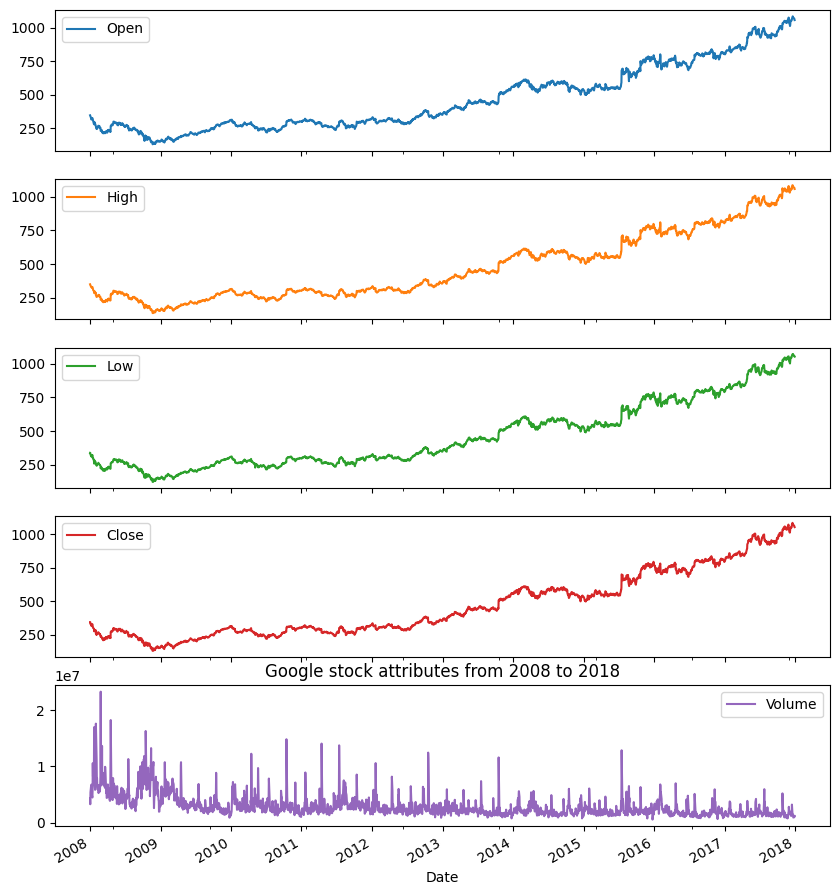

In [ ]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

Grafik ini menunjukkan berbagai atribut saham Google dari tahun 2008 hingga 2018. Berikut analisisnya:

1. Tren umum: Harga saham Google menunjukkan tren kenaikan yang kuat selama satu dekade, dengan harga meningkat sekitar empat kali lipat dari sekitar 250 dollar di tahun 2008 menjadi lebih dari 1000 dollar pada tahun 2018.

2. Atribut harga: Grafik ini mencakup empat indikator harga - Open (Pembukaan), High (Tertinggi), Low (Terendah), dan Close (Penutupan). Garis-garis ini mengikuti pola yang sangat mirip, menunjukkan pergerakan harga harian yang konsisten.

3. Volatilitas: Terdapat periode volatilitas yang lebih tinggi, terutama di tahun-tahun awal (2008-2010) dan sekitar tahun 2015, di mana fluktuasi harga tampak lebih jelas.

4. Fase pertumbuhan: Pertumbuhan saham tidak linear. Ada periode pertumbuhan cepat (misalnya 2012-2014 dan 2016-2018) diselingi dengan periode konsolidasi atau pertumbuhan yang lebih lambat.

5. Volume: Grafik bawah menunjukkan volume perdagangan dari waktu ke waktu. Pengamatan penting meliputi:
   - Lonjakan volume tertinggi terjadi pada periode 2008-2009, kemungkinan berkaitan dengan krisis keuangan global.
   - Volume umumnya menurun seiring waktu, dengan lebih sedikit lonjakan besar di tahun-tahun terakhir.
   - Beberapa lonjakan volume selaras dengan pergerakan harga yang signifikan, mungkin menandakan peristiwa penting perusahaan atau pasar.

6. Ketahanan: Meskipun ada beberapa penurunan, terutama sekitar tahun 2008 (kemungkinan karena krisis keuangan), saham menunjukkan pemulihan yang kuat dan pertumbuhan berkelanjutan.

7. Investasi jangka panjang: Investor yang memegang saham Google sepanjang periode ini akan melihat pengembalian yang signifikan, meskipun ada fluktuasi jangka pendek.

Grafik ini mendemonstrasikan kinerja kuat Google sebagai saham pertumbuhan selama satu dekade, mencerminkan pengaruh perusahaan yang berkembang di sektor teknologi dan pasar global.

###**3.2 Tabel Microsoft**

In [ ]:
# Pilih hanya kolom numerik
numeric_columns2 = microsoft.select_dtypes(include=['number'])

# Hitung korelasi
correlation_matrix2 = numeric_columns2.corr()

correlation_matrix2

,Open,High,Low,Close,Volume
Open,1.000000,0.999792,0.999758,0.999565,-0.483486
High,0.999792,1.000000,0.999703,0.999786,-0.479079
Low,0.999758,0.999703,1.000000,0.999790,-0.489700
Close,0.999565,0.999786,0.999790,1.000000,-0.485328
Volume,-0.483486,-0.479079,-0.489700,-0.485328,1.000000


In [ ]:
import plotly.express as px
fig = px.imshow(correlation_matrix2, color_continuous_scale='blues', title = '<b>Korelasi Kolom Numerik<b>', text_auto=True)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(title=dict(x=0.5, y=0.9, xanchor='center', yanchor='top'))

#Menampilkan heatmap
fig.show()

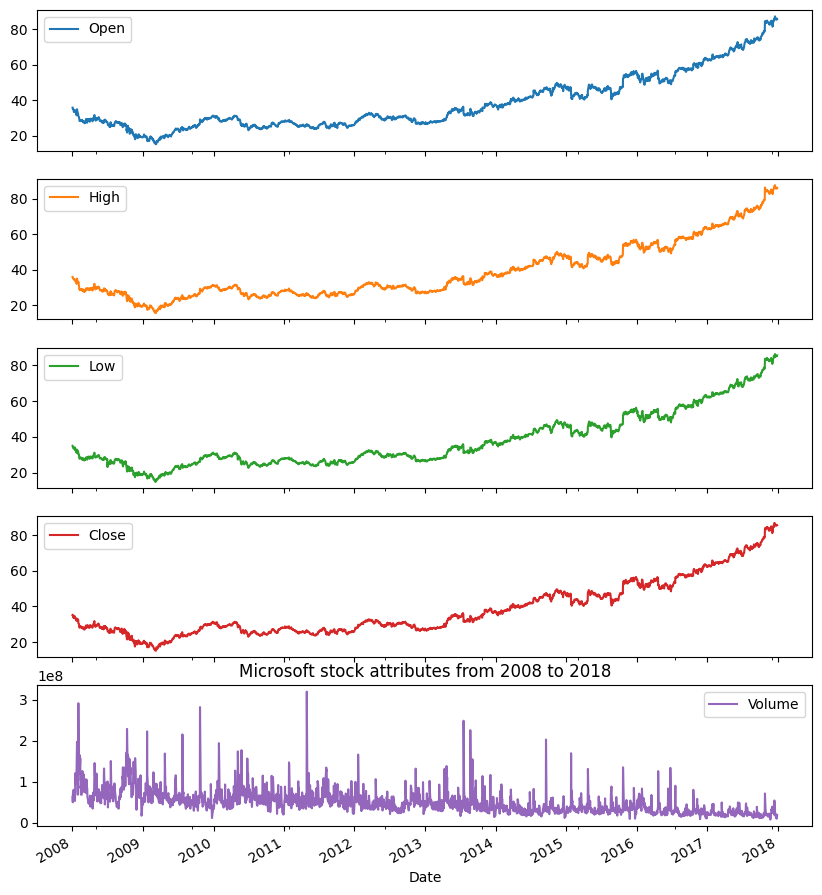

In [ ]:
microsoft['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 2008 to 2018')
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Umum:
   - Saham Microsoft menunjukkan pertumbuhan yang signifikan, meningkat dari sekitar 20 dollar di awal periode menjadi lebih dari 80 dollar di akhir periode.
   - Pertumbuhan paling pesat terlihat mulai tahun 2013 ke atas.

2. Fase-fase Pertumbuhan:
   - 2008-2013: Relatif stabil dengan sedikit pertumbuhan.
   - 2013-2018: Pertumbuhan yang kuat dan konsisten.

3. Volatilitas:
   - Terlihat penurunan tajam di awal 2009, kemungkinan terkait krisis keuangan global.
   - Volatilitas menurun seiring waktu, terutama setelah 2013.

4. Volume Perdagangan:
   - Volume tertinggi terlihat di awal periode, terutama sekitar 2008-2009.
   - Tren volume menurun seiring waktu, dengan beberapa lonjakan sporadis.

5. Performa Pasca-Krisis:
   - Microsoft menunjukkan ketahanan yang kuat setelah krisis 2008-2009, dengan pemulihan cepat dan pertumbuhan berkelanjutan.

6. Perubahan Strategi:
   - Percepatan pertumbuhan setelah 2013 mungkin mencerminkan perubahan strategi bisnis atau kepemimpinan (misalnya, fokus pada cloud computing).

7. Konsistensi Harga:
   - Garis Open, High, Low, dan Close bergerak sangat serasi, menunjukkan stabilitas harian yang relatif baik.

8. Momentum Pasar:
   - Kemiringan kurva yang meningkat setelah 2013 menunjukkan momentum pasar yang kuat untuk Microsoft.

9. Faktor Eksternal:
   - Beberapa lonjakan volume mungkin berkorelasi dengan pengumuman produk baru, laporan keuangan, atau peristiwa penting perusahaan.

10. Kapitalisasi Pasar:
    - Peningkatan harga saham yang signifikan menunjukkan pertumbuhan besar dalam kapitalisasi pasar Microsoft.

11. Perbandingan Industri:
    - Performa kuat ini mungkin mencerminkan posisi Microsoft yang semakin kuat di industri teknologi.

12. Manajemen Risiko:
    - Penurunan volatilitas seiring waktu bisa mengindikasikan manajemen risiko yang lebih baik atau diversifikasi bisnis.

Grafik ini menggambarkan transformasi Microsoft dari perusahaan yang relatif stabil menjadi pemain yang kuat dan tumbuh pesat di industri teknologi, terutama dalam paruh kedua periode yang ditampilkan.

###**3.3 Tabel Amazon**

In [ ]:
# Pilih hanya kolom numerik
numeric_columns3 = amazon.select_dtypes(include=['number'])

# Hitung korelasi
correlation_matrix3 = numeric_columns3.corr()

correlation_matrix3

,Open,High,Low,Close,Volume
Open,1.000000,0.999931,0.999896,0.999833,-0.327718
High,0.999931,1.000000,0.999889,0.999923,-0.325821
Low,0.999896,0.999889,1.000000,0.999930,-0.329444
Close,0.999833,0.999923,0.999930,1.000000,-0.327450
Volume,-0.327718,-0.325821,-0.329444,-0.327450,1.000000


In [ ]:
import plotly.express as px
fig = px.imshow(correlation_matrix3, color_continuous_scale='blues', title = '<b>Korelasi Kolom Numerik<b>', text_auto=True)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(title=dict(x=0.5, y=0.9, xanchor='center', yanchor='top'))

#Menampilkan heatmap
fig.show()

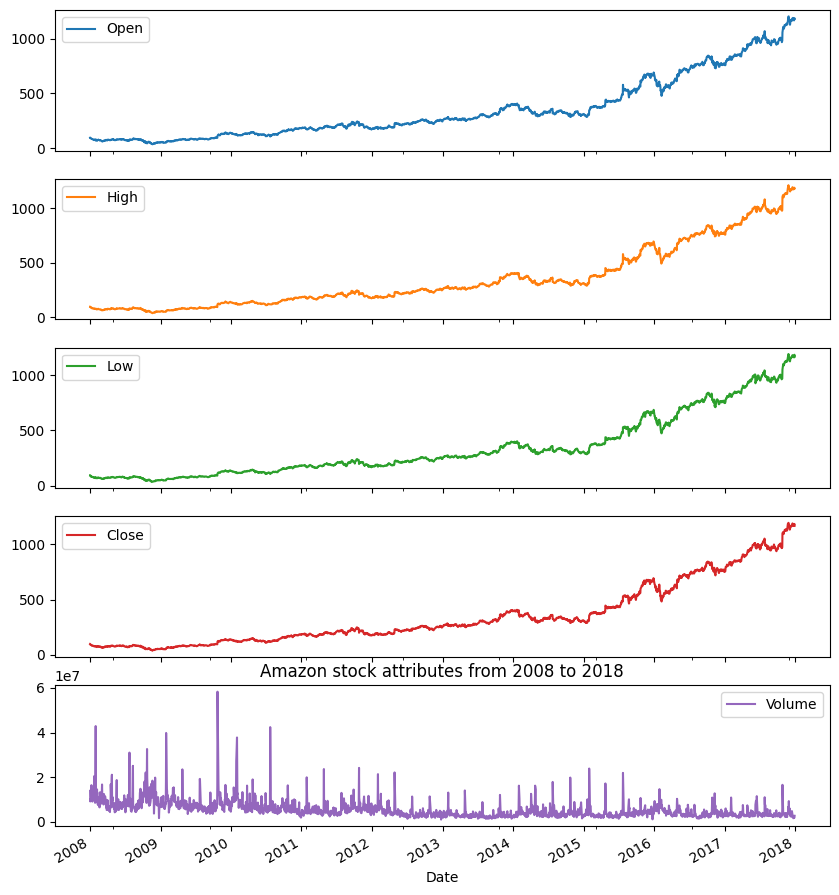

In [ ]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Pertumbuhan Luar Biasa:
   - Harga saham Amazon menunjukkan pertumbuhan yang sangat signifikan, meningkat dari sekitar 50 dollar di awal periode menjadi lebih dari 1000 dollar di akhir periode.
   - Ini menunjukkan kenaikan lebih dari 20 kali lipat dalam 10 tahun.

2. Fase Pertumbuhan:
   - 2008-2014: Pertumbuhan yang stabil namun moderat.
   - 2015-2018: Pertumbuhan yang sangat pesat dan eksponensial.

3. Ketahanan terhadap Krisis:
   - Meskipun ada sedikit penurunan di awal 2009 (kemungkinan akibat krisis keuangan global), Amazon pulih dengan cepat dan melanjutkan tren naik.

4. Volatilitas:
   - Volatilitas harga meningkat seiring dengan kenaikan harga saham, terutama setelah 2015.
   - Namun, tren keseluruhan tetap kuat naik meskipun ada fluktuasi jangka pendek.

5. Volume Perdagangan:
   - Volume perdagangan tertinggi terjadi di awal periode, dengan beberapa lonjakan besar.
   - Seiring waktu, volume cenderung menurun dan menjadi lebih stabil, meskipun masih ada lonjakan sporadis.

6. Konsistensi Harga:
   - Garis Open, High, Low, dan Close bergerak sangat selaras, menunjukkan pergerakan harga yang konsisten dalam satu hari perdagangan.

7. Momentum Pasar:
   - Kemiringan kurva yang semakin curam, terutama setelah 2015, menunjukkan momentum pasar yang sangat kuat untuk Amazon.

8. Inovasi dan Ekspansi Bisnis:
   - Pertumbuhan yang luar biasa ini kemungkinan mencerminkan keberhasilan Amazon dalam diversifikasi bisnis (misalnya, AWS, Prime) dan dominasi di e-commerce.

9. Kepercayaan Investor:
   - Peningkatan harga yang konsisten menunjukkan kepercayaan investor yang kuat terhadap model bisnis dan potensi pertumbuhan Amazon.

10. Perbandingan Industri:
    - Pertumbuhan Amazon jauh melampaui banyak perusahaan teknologi lainnya dalam periode ini, menunjukkan posisinya sebagai pemimpin pasar.

11. Faktor Eksternal:
    - Beberapa lonjakan volume mungkin berkorelasi dengan pengumuman produk baru, laporan keuangan, atau peristiwa penting perusahaan.

12. Implikasi untuk Kapitalisasi Pasar:
    - Peningkatan harga saham yang dramatis ini telah mengangkat Amazon menjadi salah satu perusahaan dengan nilai pasar tertinggi di dunia.

Grafik ini menggambarkan transformasi Amazon dari sebuah perusahaan e-commerce yang sedang berkembang menjadi salah satu raksasa teknologi terbesar di dunia, dengan pertumbuhan yang luar biasa dan dominasi pasar yang semakin kuat.

###**3.4 Tabel IBM**

In [ ]:
# Pilih hanya kolom numerik
numeric_columns4 = ibm.select_dtypes(include=['number'])

# Hitung korelasi
correlation_matrix4 = numeric_columns4.corr()

correlation_matrix4

,Open,High,Low,Close,Volume
Open,1.000000,0.999649,0.999631,0.999280,-0.455228
High,0.999649,1.000000,0.999514,0.999652,-0.447082
Low,0.999631,0.999514,1.000000,0.999640,-0.463828
Close,0.999280,0.999652,0.999640,1.000000,-0.455283
Volume,-0.455228,-0.447082,-0.463828,-0.455283,1.000000


In [ ]:
import plotly.express as px
fig = px.imshow(correlation_matrix4, color_continuous_scale='blues', title = '<b>Korelasi Kolom Numerik<b>', text_auto=True)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(title=dict(x=0.5, y=0.9, xanchor='center', yanchor='top'))

#Menampilkan heatmap
fig.show()

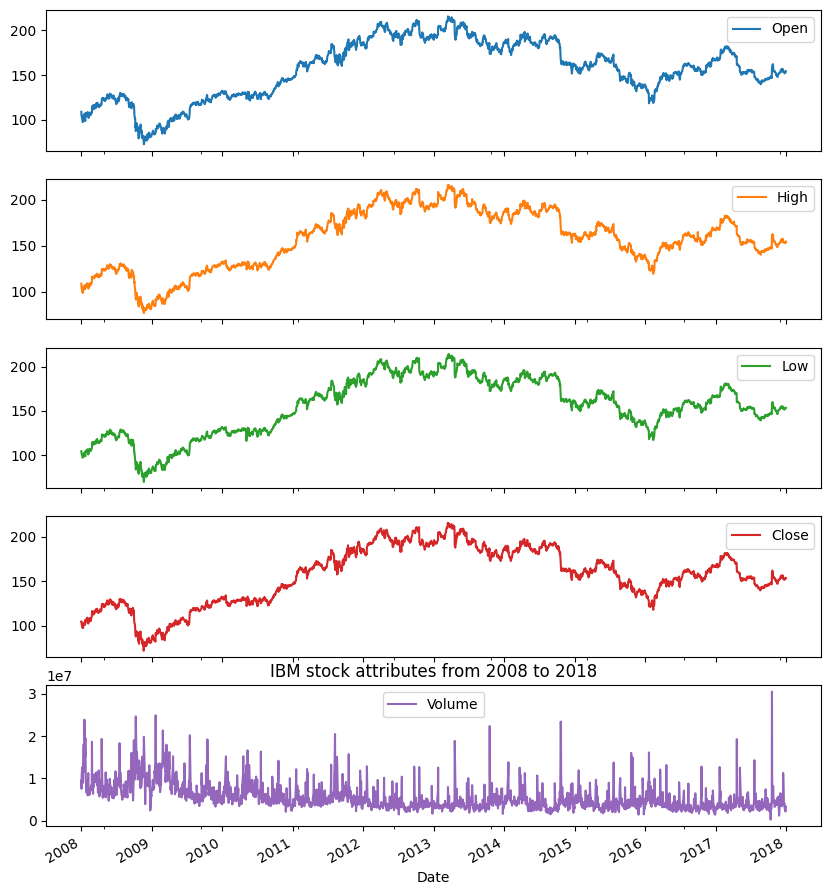

In [ ]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018')
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Umum:
   - Saham IBM menunjukkan volatilitas yang signifikan selama periode 10 tahun ini.
   - Tidak ada tren pertumbuhan jangka panjang yang jelas, melainkan fluktuasi dalam rentang harga tertentu.

2. Fase-fase Pergerakan:
   - 2008-2009: Penurunan tajam, kemungkinan akibat krisis keuangan global.
   - 2009-2013: Periode pemulihan dan pertumbuhan yang kuat.
   - 2013-2016: Puncak harga diikuti penurunan bertahap.
   - 2016-2018: Fluktuasi tanpa arah yang jelas.

3. Rentang Harga:
   - Harga bergerak dalam rentang sekitar $80 (terendah) hingga $210 (tertinggi).
   - Mayoritas pergerakan berada dalam rentang $140-$200.

4. Volatilitas:
   - Volatilitas tertinggi terlihat pada periode 2008-2009 dan 2014-2016.
   - Periode 2010-2013 menunjukkan tren naik yang lebih stabil.

5. Volume Perdagangan:
   - Volume perdagangan tertinggi terlihat di awal periode (2008-2009) dan beberapa lonjakan sporadis setelahnya.
   - Secara umum, volume cenderung menurun seiring waktu, dengan beberapa lonjakan sesekali.

6. Konsistensi Harga Harian:
   - Garis Open, High, Low, dan Close bergerak sangat serasi, menunjukkan pergerakan harga yang konsisten dalam satu hari perdagangan.

7. Kinerja Jangka Panjang:
   - Meskipun ada fluktuasi signifikan, harga saham di akhir periode (2018) tidak jauh berbeda dari awal periode (2008), menunjukkan kinerja yang relatif stabil dalam jangka panjang.

8. Tantangan Bisnis:
   - Penurunan harga setelah 2013 mungkin mencerminkan tantangan yang dihadapi IBM dalam beradaptasi dengan perubahan industri teknologi.

9. Restrukturisasi dan Transformasi:
   - Fluktuasi harga yang signifikan mungkin mencerminkan upaya IBM untuk melakukan restrukturisasi dan transformasi bisnis.

10. Faktor Eksternal:
    - Beberapa lonjakan volume mungkin berkorelasi dengan pengumuman keuangan, perubahan strategi, atau peristiwa penting perusahaan.

11. Perbandingan dengan Industri:
    - Kinerja IBM tampaknya kurang impresif dibandingkan dengan beberapa perusahaan teknologi lain yang menunjukkan pertumbuhan lebih kuat dalam periode yang sama.

Grafik ini menggambarkan perjalanan IBM yang penuh tantangan selama dekade tersebut. Perusahaan mengalami periode pertumbuhan dan penurunan, mencerminkan upayanya untuk beradaptasi dengan perubahan lanskap teknologi. Meskipun mampu mempertahankan nilai sahamnya dalam jangka panjang, IBM tidak menunjukkan pertumbuhan yang signifikan seperti beberapa pesaingnya di industri teknologi.

##**4. Trend dan Seasonality Nilai High**

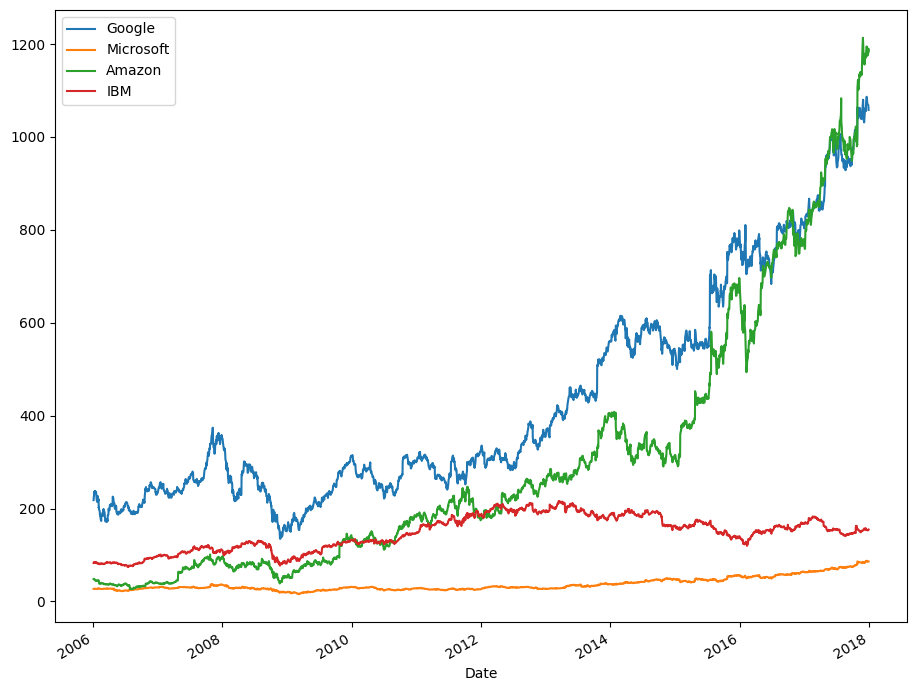

In [ ]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

Seperti yang bisa kita lihat di sini, nilai "High" Microsoft perlahan-lahan meningkat dalam garis lurus. Nilai "High" IBM dan nilai "High" Amazon dimulai dari tahap yang kira-kira sama, bahkan nilai "High" Amazon sedikit lebih rendah tetapi setelah tahun 2012 nilai "High" Amazon mulai meningkat secara eksponensial dan sedikit penurunan untuk nilai "High" IBM. Sejak tahun 2016 terjadi pertarungan sengit antara nilai "High" Google dan nilai "High" Amazon pada tahun 2018 Nilai "High" Amazon juga mengalahkan nilai "High" Google.

###**4.1 Tabel Google**

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
!pip show statsmodels

Name: statsmodels
Version: 0.14.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: plotnine


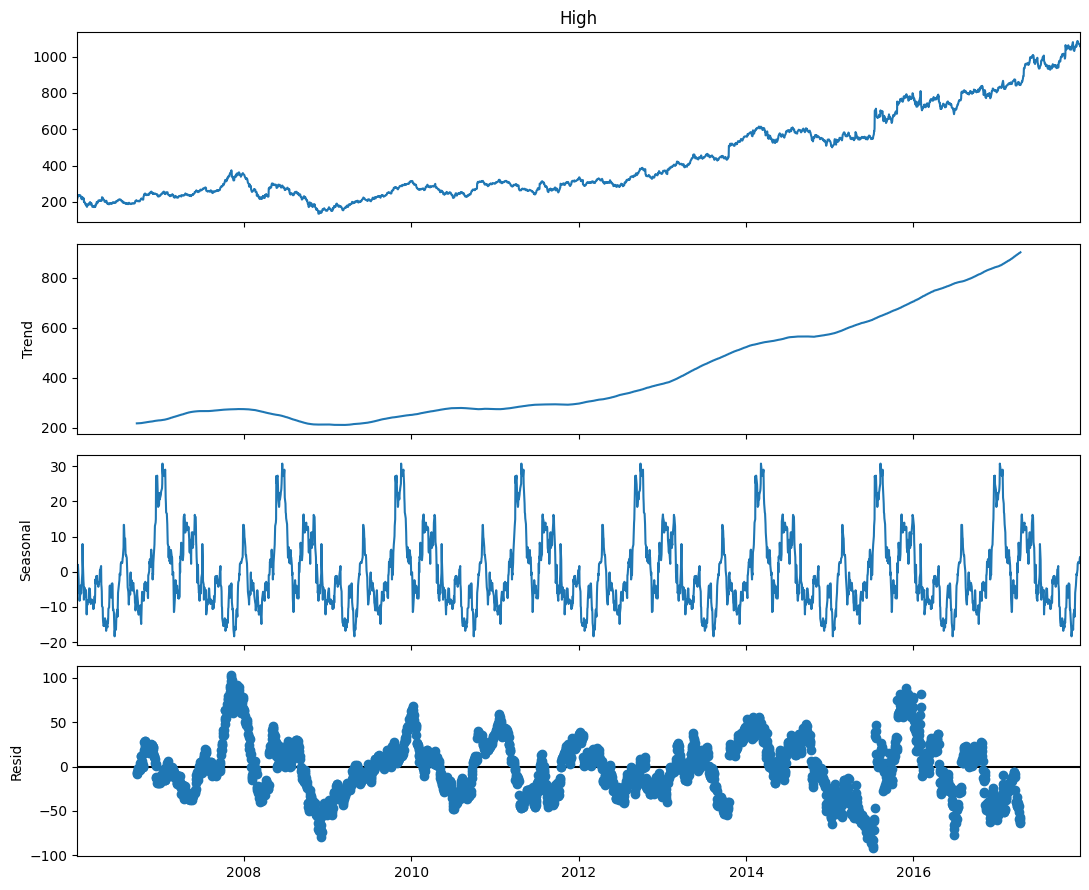

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (High):
   - Grafik menunjukkan tren kenaikan yang signifikan, terutama setelah tahun 2012.
   - Harga bergerak dari sekitar 25 di awal periode hingga mencapai lebih dari 80 di akhir periode.
   - Terdapat periode penurunan dan konsolidasi antara 2008-2012 sebelum tren kenaikan yang kuat dimulai.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan pola U-shaped, dengan penurunan awal hingga 2010, kemudian stabilisasi, dan akhirnya kenaikan yang cepat setelah 2012.
   - Kenaikan tren tampak semakin cepat di tahun-tahun terakhir, menunjukkan akselerasi pertumbuhan.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang sangat konsisten dan berulang setiap tahun.
   - Amplitudo sekitar 1-2 poin, menunjukkan variasi musiman yang relatif kecil namun konsisten.
   - Pola ini mencerminkan siklus bisnis tahunan yang stabil dan dapat diprediksi.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Volatilitas residual tampak relatif konsisten sepanjang periode, dengan beberapa puncak dan lembah yang signifikan.
   - Terdapat periode residual negatif yang cukup panjang sekitar tahun 2009, menunjukkan penyimpangan signifikan dari tren.

5. Analisis Keseluruhan:
   - Data menunjukkan perubahan dinamika pasar yang signifikan, dari periode penurunan/stabilisasi ke periode pertumbuhan yang kuat.
   - Pola musiman yang sangat stabil memberikan prediktabilitas tertentu dalam fluktuasi harga jangka pendek.
   - Perubahan tren yang dramatis setelah 2012 menunjukkan kemungkinan adanya perubahan fundamental dalam industri atau ekonomi yang relevan.

Kesimpulan:
Grafik ini menggambarkan perjalanan harga yang menarik, dengan transformasi dari fase penurunan/stabilisasi ke fase pertumbuhan yang kuat. Hal ini dapat mengindikasikan beberapa hal:

1. Pemulihan dan pertumbuhan sektor atau industri terkait setelah periode tantangan.
2. Perubahan struktural dalam industri yang mendorong valuasi lebih tinggi.
3. Perubahan kebijakan atau kondisi makro ekonomi yang mendukung pertumbuhan.

Investor dan pelaku pasar perlu memperhatikan:
- Potensi kelanjutan tren kenaikan, mengingat kekuatan dan konsistensinya dalam beberapa tahun terakhir.
- Kemungkinan overvaluation jika kenaikan harga tidak didukung oleh fundamental yang kuat.
- Pentingnya memahami faktor-faktor yang mendorong perubahan tren ini untuk menilai keberlanjutannya.

Strategi investasi sebaiknya mempertimbangkan momentum pertumbuhan yang kuat ini, namun tetap waspada terhadap potensi koreksi atau perubahan tren. Analisis fundamental dan pemantauan faktor makro ekonomi tetap krusial untuk navigasi pasar yang efektif.

###**4.2. Tabel Microsoft**

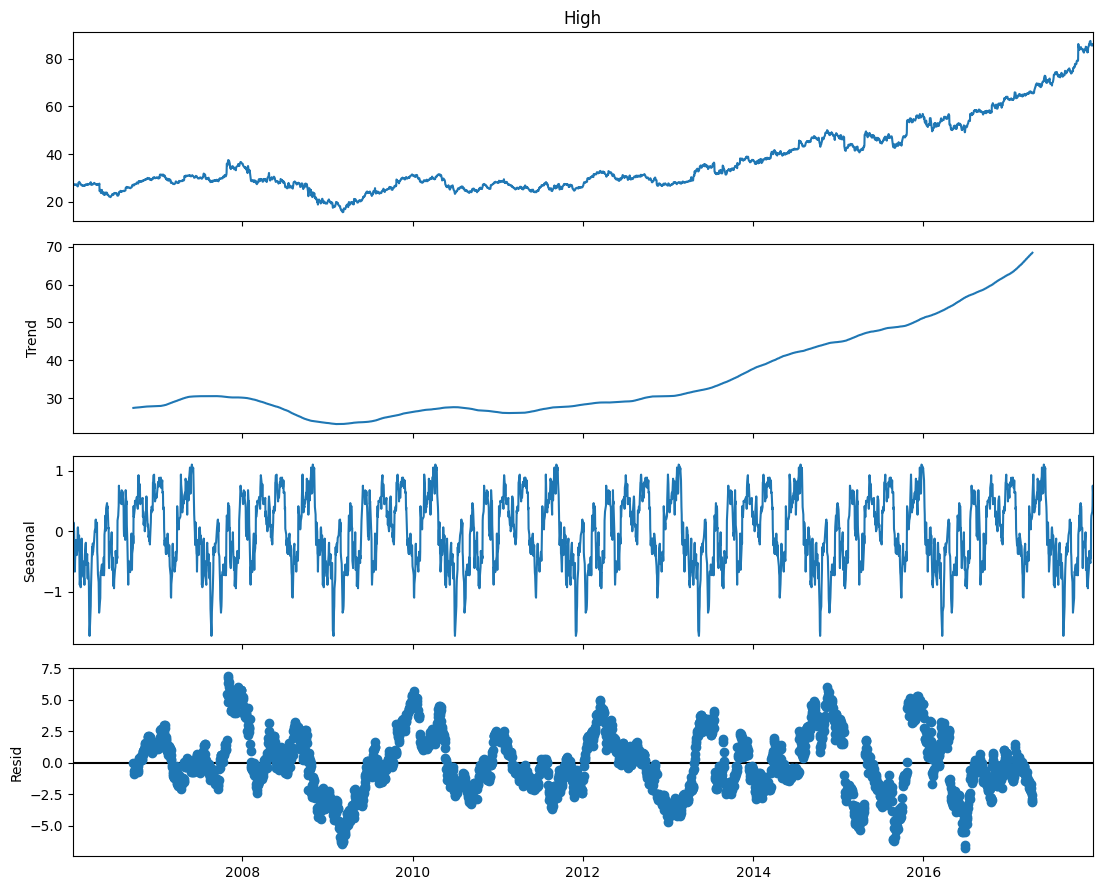

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["High"],period=360) # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (High):
   - Grafik menunjukkan tren kenaikan yang signifikan, terutama setelah tahun 2012.
   - Harga bergerak dari sekitar 30 di awal periode hingga mencapai lebih dari 80 di akhir periode.
   - Terdapat periode penurunan dan stabilisasi antara 2008-2012 sebelum tren kenaikan yang kuat dimulai.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan pola U-shaped, dengan penurunan awal hingga 2010, kemudian stabilisasi, dan akhirnya kenaikan yang cepat setelah 2012.
   - Kenaikan tren tampak semakin cepat di tahun-tahun terakhir, menunjukkan akselerasi pertumbuhan.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang sangat konsisten dan berulang setiap tahun.
   - Amplitudo sekitar 2 poin, menunjukkan variasi musiman yang relatif kecil namun konsisten.
   - Pola ini mencerminkan siklus bisnis tahunan yang stabil dan dapat diprediksi.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Volatilitas residual tampak relatif konsisten sepanjang periode, dengan beberapa puncak dan lembah yang signifikan.
   - Terdapat periode residual negatif yang cukup panjang sekitar tahun 2009, menunjukkan penyimpangan signifikan dari tren.

5. Analisis Keseluruhan:
   - Data menunjukkan perubahan dinamika pasar yang signifikan, dari periode penurunan/stabilisasi ke periode pertumbuhan yang kuat.
   - Pola musiman yang sangat stabil memberikan prediktabilitas tertentu dalam fluktuasi harga jangka pendek.
   - Perubahan tren yang dramatis menunjukkan kemungkinan adanya perubahan fundamental dalam industri atau ekonomi yang relevan.

Kesimpulan:
Grafik ini menggambarkan perjalanan harga yang kompleks, dengan transformasi dari fase penurunan/stabilisasi ke fase pertumbuhan yang kuat. Pola ini bisa mengindikasikan:

1. Perubahan struktural dalam industri atau ekonomi yang mendorong valuasi lebih tinggi setelah 2012.
2. Pemulihan dari krisis atau tantangan sebelumnya, diikuti oleh periode pertumbuhan yang kuat.
3. Perubahan dalam persepsi pasar atau fundamental yang mendukung aset atau industri terkait.

Investor dan pelaku pasar perlu memperhatikan:
- Potensi kelanjutan tren kenaikan, mengingat kekuatan dan konsistensinya dalam beberapa tahun terakhir.
- Risiko potensial dari pertumbuhan yang terlalu cepat, yang mungkin mengarah pada koreksi di masa depan.
- Pentingnya memahami faktor-faktor fundamental yang mendorong perubahan tren ini untuk menilai keberlanjutannya.

Strategi investasi harus mempertimbangkan momentum pertumbuhan yang kuat sambil tetap waspada terhadap potensi perubahan tren atau koreksi. Analisis fundamental dan pemantauan faktor makro ekonomi tetap penting untuk memahami dan mengantisipasi pergerakan harga di masa depan.

###**4.3 Tabel Amazon**

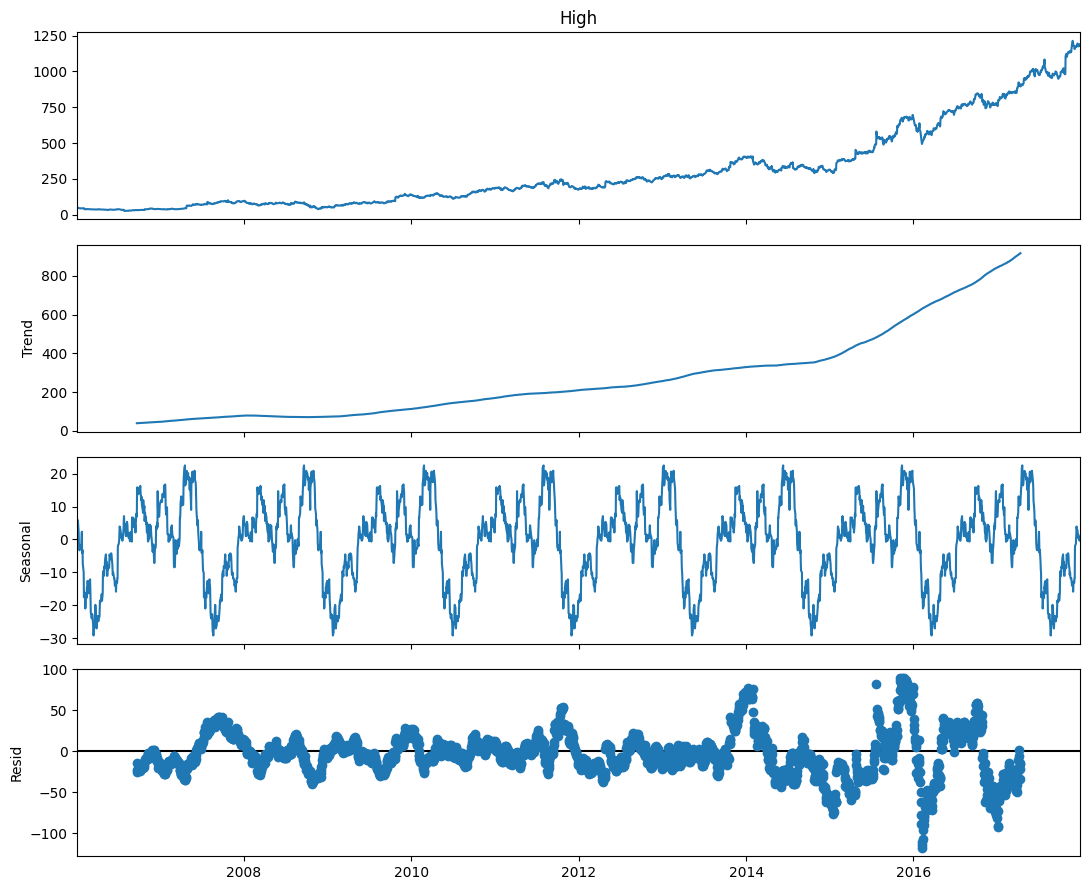

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (High):
   - Grafik menunjukkan tren kenaikan yang sangat signifikan dan konsisten selama periode yang ditampilkan.
   - Harga bergerak dari sekitar 50 di awal periode hingga mencapai lebih dari 1250 di akhir periode.
   - Kenaikan harga tampak semakin cepat terutama setelah tahun 2014.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan kenaikan yang semakin cepat, dengan kurva yang cenderung eksponensial.
   - Tren awalnya relatif datar hingga 2010, kemudian mulai naik secara gradual, dan akhirnya meningkat sangat cepat setelah 2014.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang sangat konsisten dan berulang setiap tahun.
   - Amplitudo sekitar 50 poin, menunjukkan variasi musiman yang cukup signifikan.
   - Pola ini mencerminkan siklus bisnis tahunan yang stabil dan dapat diprediksi.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Volatilitas residual tampak meningkat seiring waktu, terutama setelah 2014.
   - Terdapat beberapa periode dengan residual yang sangat tinggi, khususnya di tahun 2015-2016, menunjukkan peristiwa atau faktor luar biasa yang mempengaruhi harga.

5. Analisis Keseluruhan:
   - Data menunjukkan pertumbuhan yang luar biasa kuat, dengan akselerasi pertumbuhan yang signifikan di tahun-tahun terakhir.
   - Pola musiman yang sangat stabil memberikan prediktabilitas tertentu dalam fluktuasi harga jangka pendek.
   - Peningkatan volatilitas residual, terutama di akhir periode, menunjukkan bahwa pasar menjadi lebih dinamis dan mungkin lebih sulit diprediksi dalam jangka pendek.

Kesimpulan:
Grafik ini menggambarkan perjalanan pertumbuhan yang luar biasa kuat dengan akselerasi dramatis di tahun-tahun terakhir. Pola musiman yang konsisten memberikan elemen prediktabilitas, namun peningkatan volatilitas residual menunjukkan bahwa pasar menjadi semakin kompleks dan dinamis.

Tren pertumbuhan eksponensial ini bisa mengindikasikan beberapa hal:
1. Fundamental yang sangat kuat dan terus membaik.
2. Potensi bubble atau overvaluation, terutama jika pertumbuhan tidak didukung oleh fundamental.
3. Perubahan struktural dalam industri atau ekonomi yang mendorong valuasi lebih tinggi.

Investor dan pelaku pasar perlu waspada terhadap risiko koreksi, terutama mengingat kecepatan pertumbuhan yang luar biasa. Strategi investasi harus mempertimbangkan potensi pertumbuhan lanjutan sambil juga mempersiapkan diri untuk kemungkinan volatilitas atau koreksi yang signifikan. Analisis fundamental yang mendalam dan pemantauan faktor-faktor makro ekonomi menjadi sangat penting dalam konteks ini.

###**4.4 Tabel IBM**

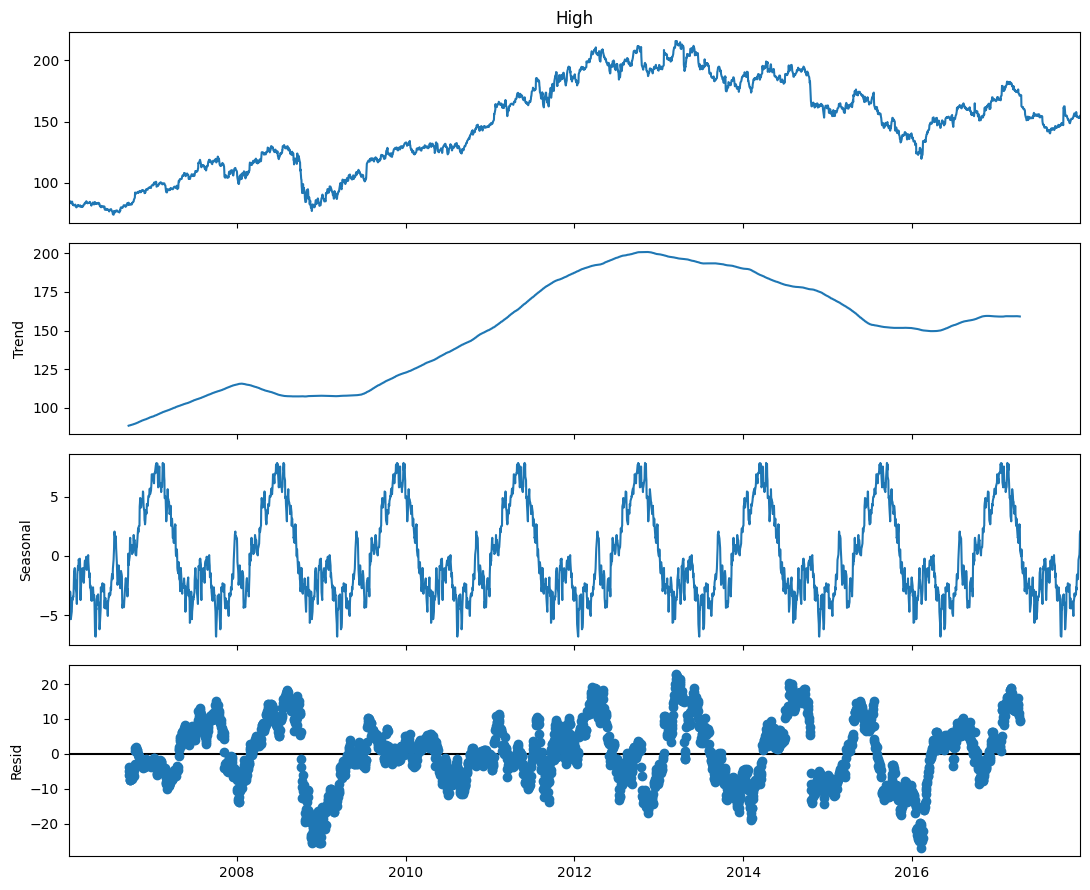

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (High):
   - Grafik menunjukkan tren kenaikan yang signifikan dari 2008 hingga 2012, mencapai puncak sekitar 210.
   - Setelah 2012, terjadi penurunan gradual dengan fluktuasi, berakhir di sekitar 150 pada akhir periode.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan kenaikan yang kuat dari 2008 hingga 2012, kemudian mengalami penurunan bertahap.
   - Tren keseluruhan masih positif dibandingkan awal periode, meskipun ada penurunan di tahun-tahun terakhir.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang sangat konsisten dan berulang setiap tahun.
   - Amplitudo sekitar 10 poin, menunjukkan variasi musiman yang signifikan dan teratur.
   - Pola ini mungkin mencerminkan siklus bisnis tahunan atau faktor musiman yang mempengaruhi harga secara konsisten.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Terdapat beberapa periode dengan residual yang lebih tinggi, terutama sekitar tahun 2009 dan 2015-2016.
   - Volatilitas residual tampak relatif konsisten sepanjang periode, dengan beberapa puncak dan lembah yang signifikan.

5. Analisis Keseluruhan:
   - Data menunjukkan pertumbuhan yang kuat di awal periode, diikuti oleh stabilisasi dan penurunan moderat.
   - Pola musiman yang sangat konsisten memberikan prediktabilitas tertentu dalam fluktuasi harga jangka pendek.
   - Residual menunjukkan adanya faktor-faktor jangka pendek yang mempengaruhi harga di luar tren dan musiman.

Kesimpulan:
Grafik ini menggambarkan dinamika pasar yang kompleks dengan fase pertumbuhan kuat diikuti oleh konsolidasi dan penurunan moderat. Pola musiman yang sangat konsisten menyediakan peluang untuk strategi perdagangan jangka pendek yang dapat diprediksi. Meskipun tren jangka panjang menunjukkan penurunan sejak 2012, harga masih berada di level yang lebih tinggi dibandingkan awal periode. Investor dan pelaku pasar perlu mempertimbangkan kombinasi faktor tren jangka panjang, pola musiman yang kuat, dan volatilitas jangka pendek dalam mengembangkan strategi investasi atau perdagangan. Kewaspadaan terhadap perubahan tren dan faktor-faktor yang mempengaruhi residual juga penting untuk manajemen risiko yang efektif.

##**5. Trend dan Seasonality Nilai Loss**

###**5.1 Tabel Google**

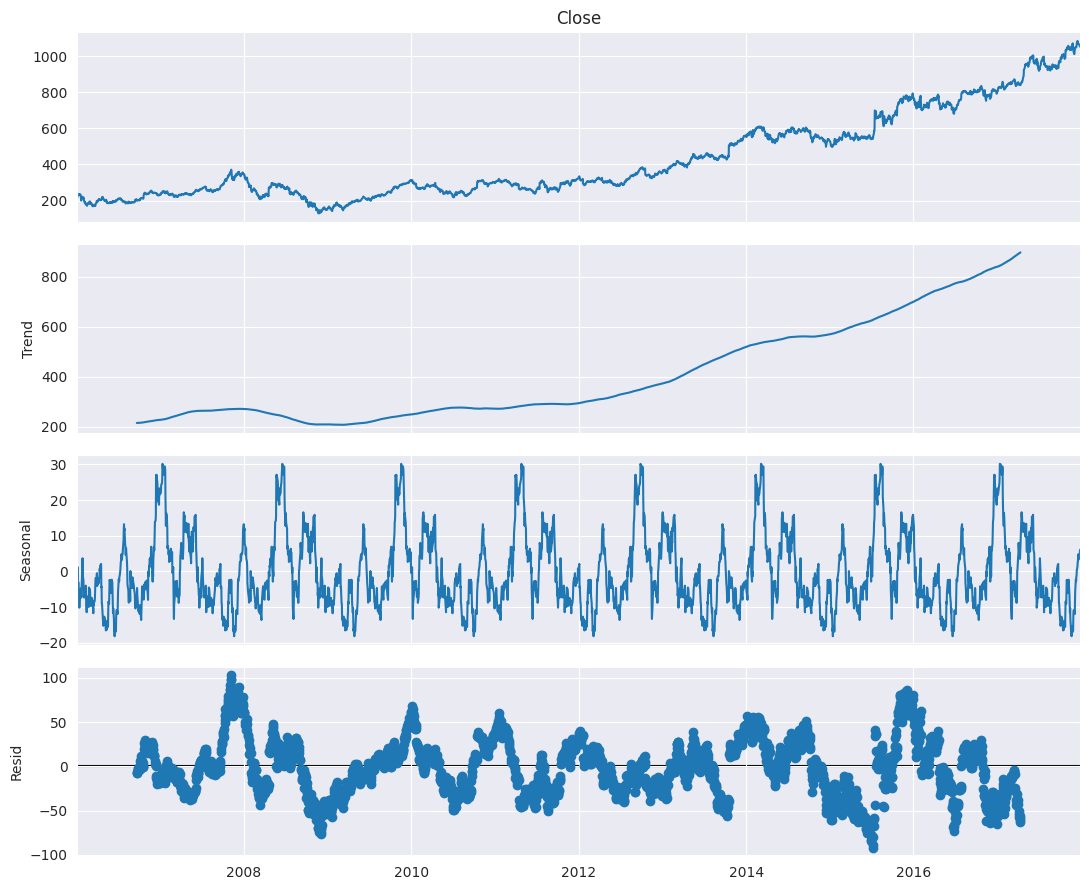

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (Close):
   - Grafik menunjukkan tren kenaikan yang signifikan dan konsisten selama periode yang ditampilkan.
   - Harga bergerak dari sekitar 200 di awal periode hingga mencapai lebih dari 1000 di akhir periode.
   - Terdapat fluktuasi jangka pendek, namun tren keseluruhan tetap naik dengan kuat.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan kenaikan yang semakin cepat, terutama setelah tahun 2012.
   - Tren awalnya relatif datar hingga 2010, kemudian mulai naik secara gradual, dan akhirnya meningkat lebih cepat setelah 2014.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang konsisten dan berulang setiap tahun.
   - Amplitudo sekitar 20-30 poin, menunjukkan variasi musiman yang cukup signifikan.
   - Pola ini mungkin mencerminkan siklus bisnis tahunan atau faktor musiman yang mempengaruhi harga secara reguler.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Terdapat beberapa periode dengan residual yang lebih tinggi, terutama sekitar tahun 2008 dan 2015-2016.
   - Volatilitas residual tampak meningkat seiring waktu, menunjukkan peningkatan ketidakpastian atau pengaruh faktor eksternal.

5. Analisis Keseluruhan:
   - Data menunjukkan pertumbuhan yang kuat dan konsisten, dengan akselerasi pertumbuhan di tahun-tahun terakhir.
   - Pola musiman yang stabil mengindikasikan adanya faktor siklikal yang konsisten mempengaruhi harga.
   - Peningkatan volatilitas residual menunjukkan bahwa faktor-faktor jangka pendek menjadi lebih berpengaruh terhadap harga.

6. Implikasi Bisnis:
   - Tren kenaikan yang kuat menunjukkan kinerja positif atau peningkatan nilai aset yang signifikan.
   - Konsistensi pola musiman dapat dimanfaatkan untuk perencanaan bisnis dan strategi jangka pendek.
   - Peningkatan volatilitas mengindikasikan perlunya strategi manajemen risiko yang lebih kuat.

7. Perhatian Investor:
   - Investor perlu memperhatikan faktor-faktor yang mendorong pertumbuhan kuat, terutama setelah 2012.
   - Pola musiman bisa dimanfaatkan untuk strategi perdagangan jangka pendek.
   - Peningkatan volatilitas residual menunjukkan perlunya kewaspadaan terhadap risiko jangka pendek.

Kesimpulannya, grafik ini menggambarkan perjalanan pertumbuhan yang sangat kuat dengan akselerasi di tahun-tahun terakhir. Pola musiman yang stabil memberikan prediktabilitas tertentu, namun peningkatan volatilitas residual menunjukkan bahwa pasar menjadi lebih dinamis dan mungkin lebih sulit diprediksi dalam jangka pendek. Tren positif jangka panjang ini menunjukkan kinerja yang sangat baik, namun juga mengisyaratkan perlunya strategi yang lebih kompleks untuk mengelola risiko dan memanfaatkan peluang.

###**5.2 Tabel Microsoft**

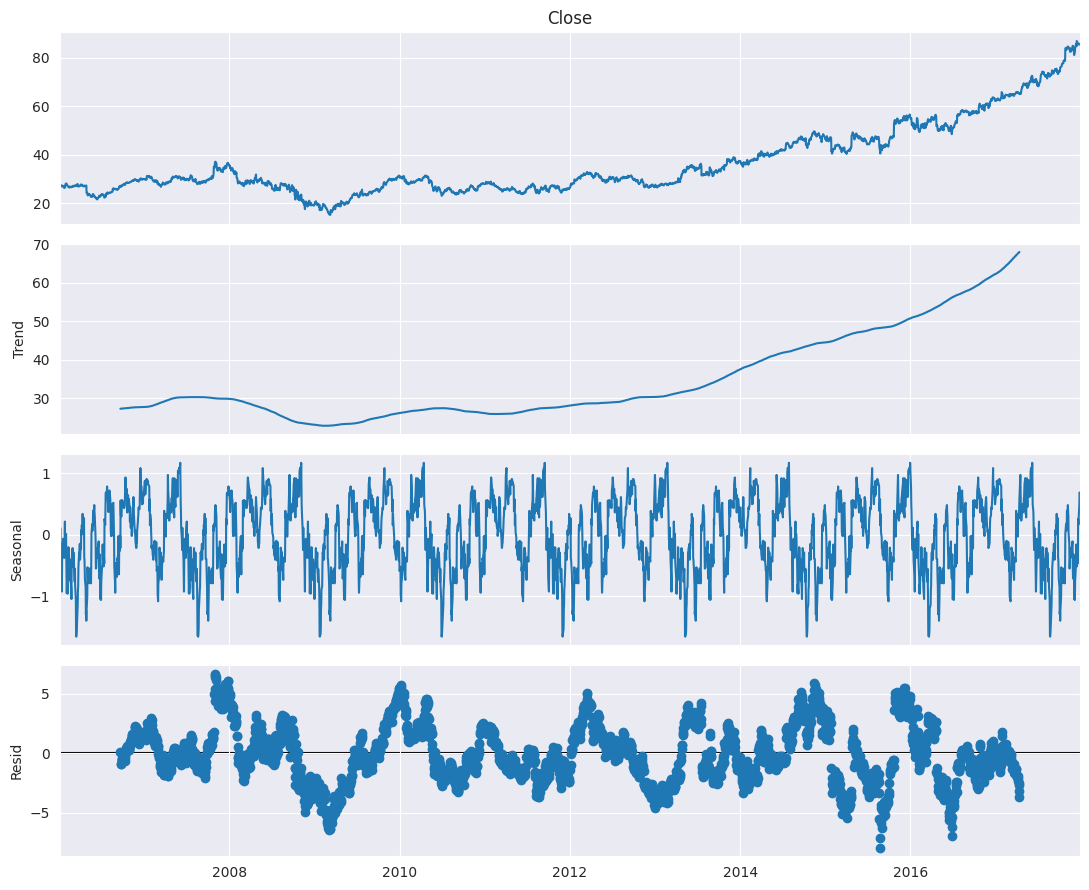

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["Close"],period=360) # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (Close):
   - Grafik menunjukkan tren kenaikan yang signifikan, terutama pada paruh kedua periode yang ditampilkan.
   - Harga berfluktuasi antara 20-40 pada paruh pertama, kemudian mulai naik secara konsisten hingga mencapai sekitar 80 di akhir periode.
   - Terdapat beberapa fluktuasi kecil, namun tren keseluruhan tetap naik.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan kenaikan yang semakin cepat, terutama setelah pertengahan periode.
   - Tren awalnya relatif datar, kemudian mulai naik secara gradual, dan akhirnya meningkat lebih cepat di akhir periode.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang konsisten dan berulang.
   - Amplitudo sekitar 1-2 poin, menunjukkan variasi musiman yang relatif kecil namun konsisten.
   - Pola ini mungkin mencerminkan siklus bisnis atau faktor musiman yang mempengaruhi harga secara reguler.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Beberapa periode menunjukkan residual yang lebih tinggi, terutama di sekitar tahun 2008 dan 2015-2016, yang mungkin mengindikasikan peristiwa atau faktor eksternal yang mempengaruhi harga.

5. Analisis Keseluruhan:
   - Data menunjukkan pertumbuhan yang kuat, terutama pada paruh kedua periode.
   - Pola musiman yang stabil mengindikasikan adanya faktor siklikal yang konsisten mempengaruhi harga.
   - Terdapat beberapa periode dengan volatilitas yang lebih tinggi, terlihat dari residual yang lebih besar.

6. Implikasi Bisnis:
   - Tren kenaikan yang kuat, terutama di akhir periode, menunjukkan kinerja positif atau peningkatan nilai aset yang signifikan.
   - Konsistensi pola musiman bisa menjadi indikator stabilitas dalam siklus bisnis, meskipun efeknya relatif kecil.

7. Perhatian Investor:
   - Investor perlu memperhatikan faktor-faktor yang mendorong pertumbuhan kuat di paruh kedua periode.
   - Pola musiman, meskipun kecil, bisa dimanfaatkan untuk strategi perdagangan jangka pendek.
   - Periode dengan residual yang lebih tinggi mungkin memerlukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhinya.

Kesimpulannya, grafik ini menggambarkan perjalanan pertumbuhan yang kuat, terutama pada paruh kedua periode, dengan pola musiman yang stabil namun kecil, dan beberapa periode volatilitas yang lebih tinggi. Tren positif jangka panjang ini menunjukkan kinerja yang baik, terutama menjelang akhir periode yang diamati.

###**5.3 Tabel Amazon**

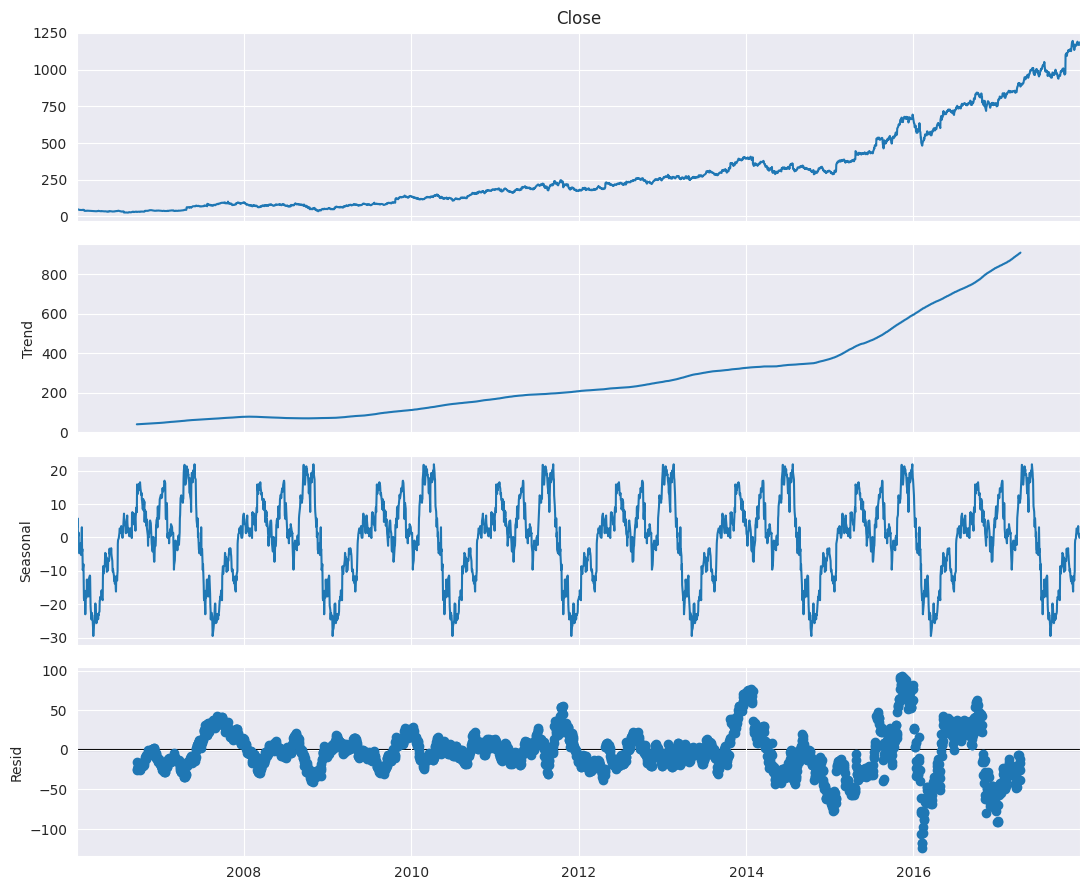

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["Close"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (Close):
   - Grafik menunjukkan tren kenaikan yang konsisten dan signifikan selama periode ini.
   - Tidak terlihat penurunan tajam, melainkan pertumbuhan yang stabil dari awal hingga akhir periode.
   - Harga meningkat dari sekitar 50 di awal periode hingga lebih dari 1000 di akhir periode.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan kenaikan yang stabil dan semakin cepat sepanjang periode.
   - Tidak ada puncak atau penurunan tren yang terlihat; tren terus naik hingga akhir periode.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang konsisten dan berulang setiap tahun.
   - Amplitudo sekitar 20-30 poin, menunjukkan variasi musiman yang cukup signifikan.
   - Pola ini mungkin terkait dengan siklus bisnis atau faktor musiman yang mempengaruhi harga.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Beberapa periode menunjukkan residual yang lebih tinggi, terutama di tahun-tahun terakhir, mengindikasikan peningkatan volatilitas.

5. Analisis Keseluruhan:
   - Data menunjukkan pertumbuhan yang kuat dan konsisten sepanjang periode.
   - Pola musiman yang stabil mengindikasikan adanya faktor siklikal yang mempengaruhi harga.
   - Terdapat peningkatan volatilitas dalam beberapa tahun terakhir, terlihat dari residual yang lebih besar.

6. Implikasi Bisnis:
   - Tren kenaikan yang kuat menunjukkan kinerja positif atau peningkatan nilai aset yang konsisten.
   - Konsistensi pola musiman bisa menjadi indikator stabilitas dalam siklus bisnis.

7. Perhatian Investor:
   - Investor perlu memperhatikan faktor-faktor yang mendorong pertumbuhan konsisten ini.
   - Pola musiman bisa dimanfaatkan untuk strategi perdagangan jangka pendek.
   - Peningkatan volatilitas di tahun-tahun terakhir perlu diperhatikan untuk manajemen risiko.

Dapat disimpulkan, grafik tersebut menggambarkan perjalanan pertumbuhan yang kuat dan konsisten, dengan pola musiman yang stabil dan peningkatan volatilitas dalam periode terakhir. Tren positif jangka panjang ini menunjukkan kinerja yang sangat baik selama periode yang diamati.

###**5.4 Tabel IBM**

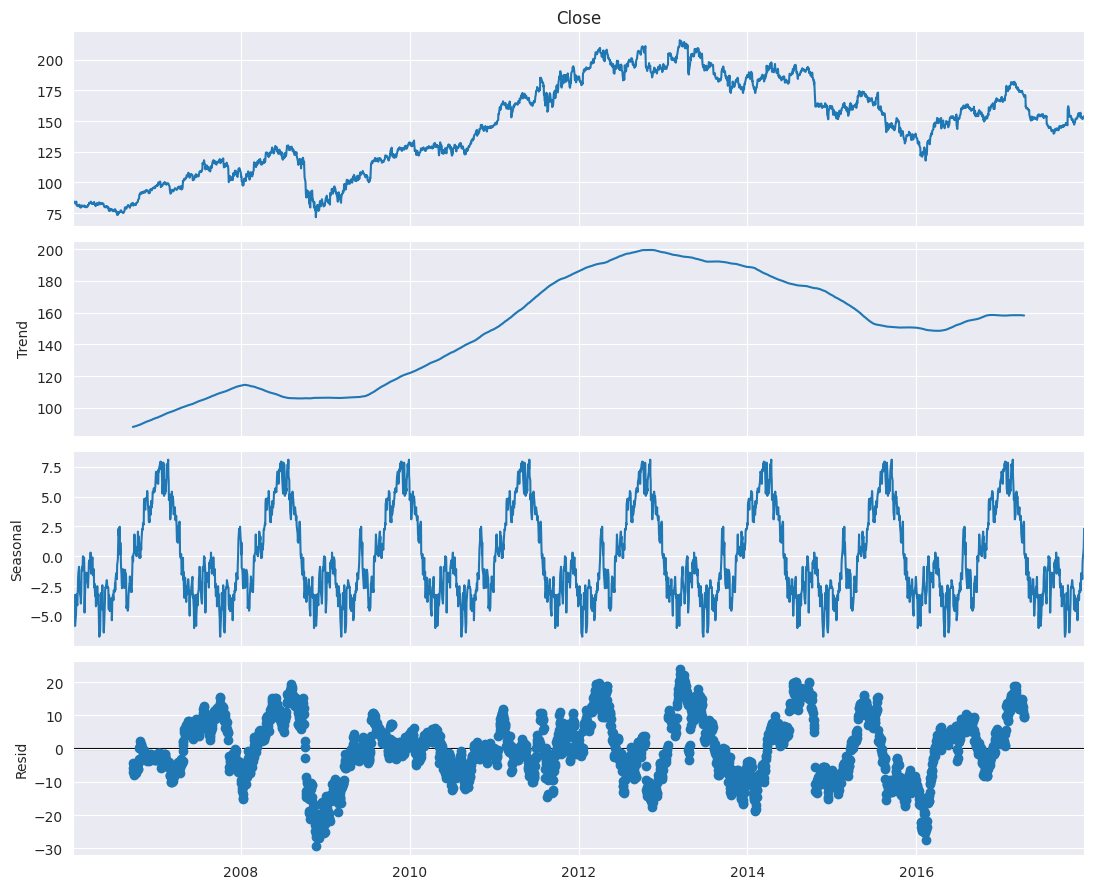

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["Close"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

Berdasarkan grafik yang ditampilkan, berikut adalah analisis komprehensif:

1. Tren Harga (Close):
   - Grafik menunjukkan volatilitas yang signifikan selama periode ini.
   - Terjadi penurunan tajam pada tahun 2008, kemungkinan terkait krisis keuangan global.
   - Setelah 2009, terjadi kenaikan yang konsisten hingga mencapai puncak sekitar tahun 2012-2013.
   - Sejak 2013, tren cenderung menurun dengan fluktuasi.

2. Tren Jangka Panjang:
   - Garis tren menunjukkan kenaikan dari 2008 hingga 2013, kemudian mulai menurun hingga 2016.
   - Puncak tren terjadi sekitar tahun 2013-2014.

3. Pola Musiman (Seasonal):
   - Grafik seasonal menunjukkan pola yang konsisten dan berulang setiap tahun.
   - Amplitudo tertinggi sekitar 7.5 poin, menunjukkan variasi musiman yang cukup signifikan.
   - Pola ini mungkin terkait dengan siklus bisnis atau pelaporan keuangan kuartalan IBM.

4. Residual:
   - Grafik residual menunjukkan fluktuasi jangka pendek yang tidak dijelaskan oleh tren atau pola musiman.
   - Beberapa periode menunjukkan residual yang lebih tinggi, mengindikasikan volatilitas atau peristiwa khusus yang mempengaruhi harga saham.

5. Analisis Keseluruhan:
   - IBM mengalami pertumbuhan yang kuat dari 2009 hingga 2013, namun menghadapi tantangan sejak 2013.
   - Pola musiman yang konsisten menunjukkan adanya faktor siklikal yang mempengaruhi harga saham.
   - Volatilitas jangka pendek (dilihat dari residual) cukup signifikan, menunjukkan sensitifitas terhadap berita atau peristiwa jangka pendek.

6. Implikasi Bisnis:
   - Penurunan tren sejak 2013 mungkin mencerminkan tantangan IBM dalam beradaptasi dengan perubahan industri teknologi.
   - Konsistensi pola musiman bisa menjadi indikator stabilitas dalam siklus bisnis IBM.

7. Perhatian Investor:
   - Investor perlu memperhatikan faktor-faktor yang menyebabkan penurunan sejak 2013 dan potensi pemulihan di masa depan.
   - Pola musiman bisa dimanfaatkan untuk strategi perdagangan jangka pendek.

Dapat disimpulkan, grafik tersebut menggambarkan perjalanan IBM yang dinamis, dengan periode pertumbuhan kuat diikuti oleh tantangan dalam beberapa tahun terakhir. Pola musiman yang konsisten dan volatilitas jangka pendek memberikan wawasan tambahan tentang dinamika harga saham IBM.

#**Prediction**

##**Time Series Forecasting**

**Time series forecasting** menggunakan informasi mengenai nilai historis dan pola-pola terkait untuk memprediksi suatu hal di masa depan. Paling sering, hal ini terkait dengan analisis tren, analisis fluktuasi siklus, dan masalah musiman. Seperti halnya semua metode prediksi, prediksi yang diberikan tidak dijamin akan selalu benar.

##**GRU Model**

**Model deep learning** yang akan kita gunakan adalah **Gated Recurrent Unit (GRU)**. **Gated Recurrent Unit (GRU)** pada dasarnya adalah LSTM yang disederhanakan. **GRU** memiliki peran yang sama persis dalam jaringan. Perbedaan utamanya terletak pada **jumlah gate dan weight**. **GRU** memiliki **2 gate**, Karena tidak memiliki **exit gate**, tidak ada kontrol atas isi memori. **Update Gate** mengendalikan aliran informasi dari aktivasi sebelumnya, serta penambahan informasi baru, sementara **reset gate** disisipkan ke dalam aktivasi kandidat.

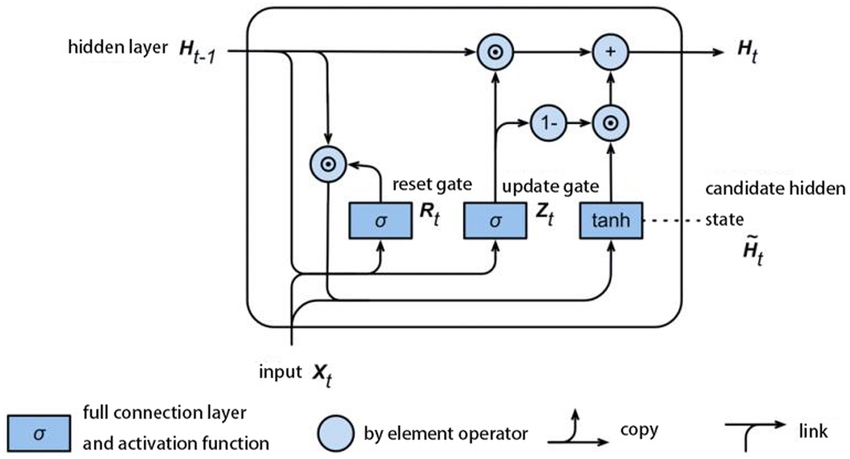

##**Modelling**

###**1. Tabel Google**

In [ ]:
filepath = 'GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [ ]:
price_google = data_google[['Close']]
price_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

<ipython-input-99-7909ce3880b7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [ ]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [ ]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.5013033151626587
Epoch  1 MSE:  0.23506933450698853
Epoch  2 MSE:  0.08875466883182526
Epoch  3 MSE:  0.11503240466117859
Epoch  4 MSE:  0.11596395820379257
Epoch  5 MSE:  0.06901244074106216
Epoch  6 MSE:  0.06035425886511803
Epoch  7 MSE:  0.07288437336683273
Epoch  8 MSE:  0.07587362080812454
Epoch  9 MSE:  0.06340029835700989
Epoch  10 MSE:  0.04434235766530037
Epoch  11 MSE:  0.032652098685503006
Epoch  12 MSE:  0.037174247205257416
Epoch  13 MSE:  0.04285839945077896
Epoch  14 MSE:  0.0306546688079834
Epoch  15 MSE:  0.01528308168053627
Epoch  16 MSE:  0.012990433722734451
Epoch  17 MSE:  0.018057646229863167
Epoch  18 MSE:  0.015633394941687584
Epoch  19 MSE:  0.004291368182748556
Epoch  20 MSE:  0.002180089009925723
Epoch  21 MSE:  0.014214292168617249
Epoch  22 MSE:  0.009187543764710426
Epoch  23 MSE:  0.003039015457034111
Epoch  24 MSE:  0.007251794449985027
Epoch  25 MSE:  0.008032613433897495
Epoch  26 MSE:  0.003263661405071616
Epoch  27 MSE:  0.000485175

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

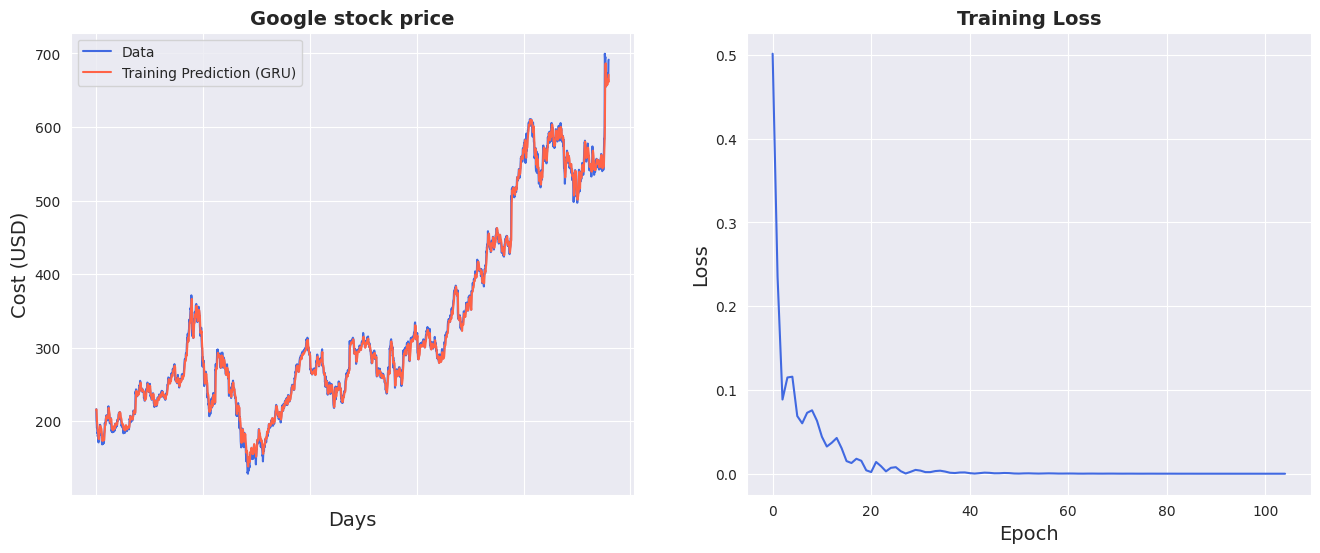

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.97 RMSE
Test Score: 45.51 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

###**2. Tabel Microsoft**

In [ ]:
filepath = 'MSFT_2006-01-01_to_2018-01-01.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [ ]:
price_microsoft = data_microsoft[['Close']]
price_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_microsoft['Close'] = scaler.fit_transform(price_microsoft['Close'].values.reshape(-1,1))

<ipython-input-115-309fabc410c2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_microsoft, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [ ]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.3313668668270111
Epoch  1 MSE:  0.08768202364444733
Epoch  2 MSE:  0.047588080167770386
Epoch  3 MSE:  0.0821605771780014
Epoch  4 MSE:  0.034455087035894394
Epoch  5 MSE:  0.02622470259666443
Epoch  6 MSE:  0.04225469008088112
Epoch  7 MSE:  0.048205431550741196
Epoch  8 MSE:  0.04002327099442482
Epoch  9 MSE:  0.027263136580586433
Epoch  10 MSE:  0.0199907124042511
Epoch  11 MSE:  0.02248726785182953
Epoch  12 MSE:  0.028984954580664635
Epoch  13 MSE:  0.029373817145824432
Epoch  14 MSE:  0.02277127467095852
Epoch  15 MSE:  0.016385985538363457
Epoch  16 MSE:  0.01494582649320364
Epoch  17 MSE:  0.017138460651040077
Epoch  18 MSE:  0.018861709162592888
Epoch  19 MSE:  0.017294712364673615
Epoch  20 MSE:  0.0128086619079113
Epoch  21 MSE:  0.008483251556754112
Epoch  22 MSE:  0.007549739908427
Epoch  23 MSE:  0.0093558793887496
Epoch  24 MSE:  0.008853604085743427
Epoch  25 MSE:  0.004634228069335222
Epoch  26 MSE:  0.0017725029028952122
Epoch  27 MSE:  0.003146561793

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

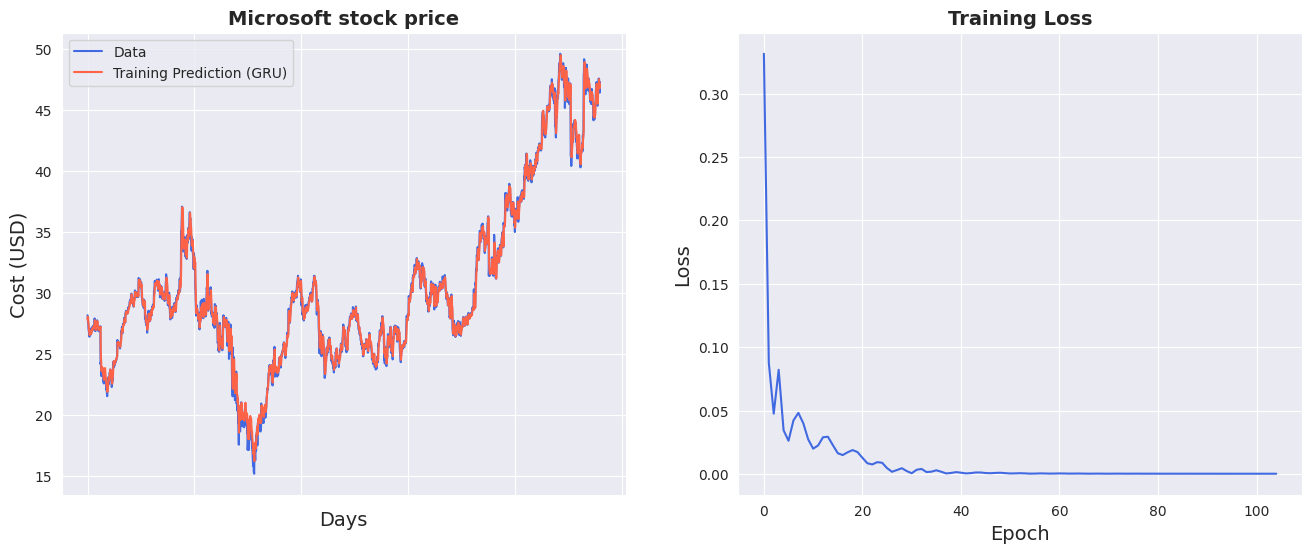

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Microsoft stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.54 RMSE
Test Score: 2.89 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_microsoft)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_microsoft)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_microsoft)-1, :] = y_test_pred

original = scaler.inverse_transform(price_microsoft['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Microsoft Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

###**3. Tabel Amazon**

In [ ]:
filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [ ]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

<ipython-input-128-aa33d90e1d28>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [ ]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.637876033782959
Epoch  1 MSE:  0.27860504388809204
Epoch  2 MSE:  0.04128561541438103
Epoch  3 MSE:  0.1814400553703308
Epoch  4 MSE:  0.09829464554786682
Epoch  5 MSE:  0.026582349091768265
Epoch  6 MSE:  0.04336903616786003
Epoch  7 MSE:  0.07478000223636627
Epoch  8 MSE:  0.08423148840665817
Epoch  9 MSE:  0.07165391743183136
Epoch  10 MSE:  0.04865209013223648
Epoch  11 MSE:  0.028478195890784264
Epoch  12 MSE:  0.021273981779813766
Epoch  13 MSE:  0.02858554758131504
Epoch  14 MSE:  0.040421560406684875
Epoch  15 MSE:  0.04361146315932274
Epoch  16 MSE:  0.03551463037729263
Epoch  17 MSE:  0.024177968502044678
Epoch  18 MSE:  0.01773548312485218
Epoch  19 MSE:  0.018131807446479797
Epoch  20 MSE:  0.022308772429823875
Epoch  21 MSE:  0.025979308411478996
Epoch  22 MSE:  0.026338724419474602
Epoch  23 MSE:  0.02300681546330452
Epoch  24 MSE:  0.01771610416471958
Epoch  25 MSE:  0.01322600245475769
Epoch  26 MSE:  0.01172615960240364
Epoch  27 MSE:  0.01325894985347

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

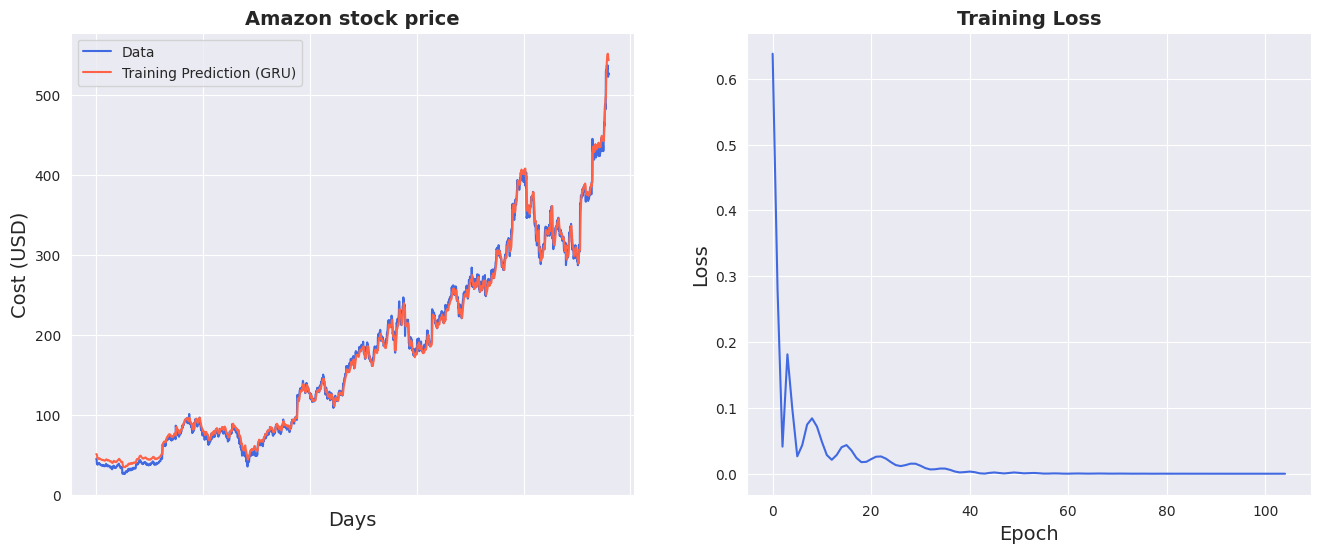

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.52 RMSE
Test Score: 30.36 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

original = scaler.inverse_transform(price_amazon['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Amazon Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

###**4. Tabel IBM**

In [ ]:
filepath = 'IBM_2006-01-01_to_2018-01-01.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
price_ibm = data_ibm[['Close']]
price_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3020 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))

<ipython-input-141-9915b8518dae>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_ibm, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2400, 19, 1)
y_train.shape =  (2400, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [ ]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.3977896273136139
Epoch  1 MSE:  0.2738156318664551
Epoch  2 MSE:  0.20514769852161407
Epoch  3 MSE:  0.12857632339000702
Epoch  4 MSE:  0.037552736699581146
Epoch  5 MSE:  0.009852970018982887
Epoch  6 MSE:  0.07648834586143494
Epoch  7 MSE:  0.03401237726211548
Epoch  8 MSE:  0.004636001773178577
Epoch  9 MSE:  0.011160153895616531
Epoch  10 MSE:  0.025711415335536003
Epoch  11 MSE:  0.03304175287485123
Epoch  12 MSE:  0.02879103273153305
Epoch  13 MSE:  0.01727904938161373
Epoch  14 MSE:  0.006455241236835718
Epoch  15 MSE:  0.002112028654664755
Epoch  16 MSE:  0.005227361340075731
Epoch  17 MSE:  0.011642794124782085
Epoch  18 MSE:  0.014646264724433422
Epoch  19 MSE:  0.011706945486366749
Epoch  20 MSE:  0.006398351397365332
Epoch  21 MSE:  0.0027045980095863342
Epoch  22 MSE:  0.0020081433467566967
Epoch  23 MSE:  0.003721266519278288
Epoch  24 MSE:  0.006064198445528746
Epoch  25 MSE:  0.007286964915692806
Epoch  26 MSE:  0.006873726844787598
Epoch  27 MSE:  0.00

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

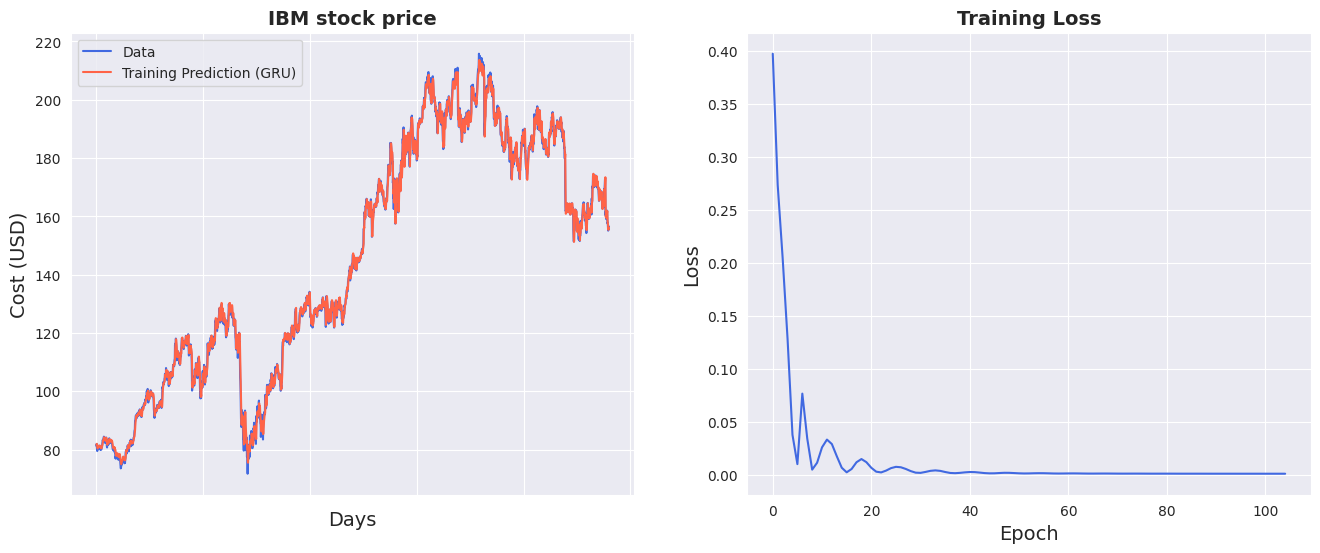

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('IBM stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 2.00 RMSE
Test Score: 1.88 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_ibm)-1, :] = y_test_pred

original = scaler.inverse_transform(price_ibm['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='IBM Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()